<a href="https://colab.research.google.com/github/Saim-Hassan786/Learn-Modern-AI-Python/blob/main/Agent-Class/Agent_Class_Parameters_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenAI Agents SDK
OpenAI Agents SDK as it name implies is a Software Development Kit or a FrameWork by OpenAI that helps us make Autonomous AI Agentic Apps that are capable of thinking, understanding and acting autonomously to resolve a user query based on its instructions.

## Features of OpenAI Agents SDk
1. Python First Aproach .
2. Agents : LLM configured with tools and instructions.
3. Handoffs : Delegating task from one Agent to Another.
4. Guardrails : For Input And Output Validation.
5. Tracing : For Logging and Debugging.
6. FunctionTools : Adding to the functionality of the Agent
7. AgentLoop : A loop that handles all the processing until the request in done.


In [ ]:
# Installing the SDK
!pip install -Uq openai-agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.8 MB/s eta 0:00:00


In [ ]:
# For running event loop
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# Pre requisites SetUp
from google.colab import userdata
GOOGLE_API_KEY= userdata.get('GOOGLE_API_KEY')

from agents import set_default_openai_api,set_default_openai_client,set_tracing_disabled
from openai import AsyncOpenAI

external_client = AsyncOpenAI(
    base_url = "https://generativelanguage.googleapis.com/v1beta/openai/",
    api_key = GOOGLE_API_KEY
)
set_default_openai_client(external_client)
set_default_openai_api("chat_completions")
set_tracing_disabled(True)

In [ ]:
# Simple Agent Execution Using OpenAI Agents SDK
from agents import Agent,Runner
agent = Agent(
    name="Simple Assistant ChatBot",
    instructions= "You are a simple assistant that helps user with their queries",
    model = "gemini-2.5-flash"
)
result = await Runner.run(
    starting_agent=agent,
    input="What are the capitals of France and Germany?",
)
result.final_output

'The capital of France is **Paris**.\nThe capital of Germany is **Berlin**.'

# AGENT CLASS
Agent is regarded as a LLM configured with instructions, tools, guardrails , handoffs and many more.
Agent is a data class and it contains following parameters :

1. **name** : str = name of the Agent
2. **instructions** : *str | Callable [Context:RunContextWrapper,agent:Agent],MaybeAwaitable[str]] | None* = that acts as a system prompt for the LLM when the agent is invoked
3. **model** : str | Model = the model which is used by the LLM when agent is invoked
4. **tools** : list[Tool] = external tools that help enhance the capabilities of an agent
5. **handoffs** : list[Agent] | list[Handoffs] = the list of task specific agents that the current agent can delegate to
6. **handoff_description** : str = a description for the agent if it to be act as a handoff for performing a delegated task
7. **mcp_servers** : list[MCPServer] = list of MCP hosted tools that can aid in the agent capabilities
8. **mcp_config** : MCPConfig = configurations of MCP server tools
9. **model_settings** : MODELSETTINGS = configuration settings for the model of LLM that we have chosen fro our agent
10. **hooks** : AgentHooks = callback functions on different lifecycle events of an agent
11. **input_guardrails** : list[InputGuardrails] = list of checks that run in parallel with agent execution to filter the input coming to agent and stop its execution on specific scenarios
12. **output_guardrails** : list[OutputGuardrails] = list of checks that run on the final output of the agent when it has generated the final response to control the final result generation on demand
13. **tool_use_behaviour** : Literal["run_llm_again","stop_on_first_tool"] | StopAtTools | ToolsToFinalOutputFunction | default = "run_llm_again" = a set of behaviour controlling instructions for a Runner Loop regarding the LLM usage.
14. **reset_tool_choice** : bool | default = True = to prevent the loop for going into infinite loop so it is set to TRUE to prevent infinit tool usage
15. **output_type** : type[Any] | AgentOutputSchemaBase | None (if None then default is str) = can define the output type for the final response.

# name

In [ ]:
# To initiate an Agent the required parameter is "name"
from agents import Agent
agent = Agent(
    name = "Assistant"
)

# instructions

In [ ]:
# static string instructions
from agents import Agent,Runner
agent = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash"
)
result = Runner.run_sync(
    starting_agent=agent,
    input="What are the capitals of France and Germany?",
)
print(f"Static Instructions : {result.final_output}")

# dynamic instructions
from pydantic import BaseModel
from agents import Agent,Runner,RunContextWrapper

class Userdata(BaseModel):
  name : str
  age : int

async def dynamic_instructions(ctx : RunContextWrapper[Userdata],agent : Agent)->str:
  return f"You are a helpful Assistant for {ctx.context.name} so always respond his queries by confronting his name first"

agent_instructions = Agent(
    name = "Assistant Agent",
    instructions= dynamic_instructions,
    model = "gemini-2.5-flash"
)
result_instructions = Runner.run_sync(
    starting_agent=agent_instructions,
    input="What are the capitals of France and Germany?",
    context = Userdata(name="Saim",age=20)
)
print(f"Dynamic Instructions : {result_instructions.final_output}")



Static Instructions : The capital of France is **Paris**, and the capital of Germany is **Berlin**.
Dynamic Instructions : Saim, the capital of France is Paris and the capital of Germany is Berlin.


# model

In [ ]:
# model parameter
from agents import Agent, Runner

agent_with_model_1 = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash"
)
result_with_model_1 = Runner.run_sync(
    starting_agent=agent_with_model_1,
    input="What is cloud computing in 100 words?",
)
print(f"Model 1 : {result_with_model_1.final_output}")
print("=======" * 20)

agent_with_model_2 = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-pro"
)
result_with_model_2 = Runner.run_sync(
    starting_agent=agent_with_model_2,
    input="What is agentic ai in 100 words?",
)
print(f"Model 2 : {result_with_model_2.final_output}")
print("=======" * 20)

Model 1 : Cloud computing is the delivery of on-demand computing services—including servers, storage, databases, networking, software, and analytics—over the Internet ("the cloud"). Instead of owning and maintaining your own computing infrastructure, you access these services from a third-party cloud provider (e.g., AWS, Azure).

Key benefits include pay-as-you-go pricing, elasticity (scaling resources up or down quickly), and high availability. This model reduces operational costs and increases flexibility, allowing businesses and individuals to leverage powerful technology without the burden of maintaining physical hardware. It democratizes IT resources, enabling faster innovation and scalability for various needs.
Model 2 : Agentic AI represents a shift from passive, reactive systems to proactive, autonomous ones. Instead of just responding to a prompt, an AI agent is given a high-level goal.

It then independently creates a plan, breaks it down into executable steps, and uses tools

# tools

Tools 1 : The result is 50.
Tools 2 : I cannot divide by zero. Please provide a different number to divide by.


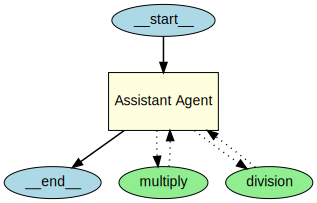

In [ ]:
# tools list using @function_tool
from agents import Agent,Runner,function_tool
from agents.extensions.visualization import draw_graph

@function_tool
def multiply(a:int,b:int) -> int:
  """Multiplies two numbers"""
  return a * b

@function_tool
def division(c:int,d:int) -> int | str :
  """Divides two numbers"""
  try :
    return c / d
  except ZeroDivisionError:
    return "Cannot divide by zero"

agent_with_tools = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    tools = [multiply,division]
)
result_with_tools_1 = Runner.run_sync(
    starting_agent=agent_with_tools,
    input="Multiply 5 and 10",
)
print(f"Tools 1 : {result_with_tools_1.final_output}")
print("=======" * 20)

result_with_tools_2 = Runner.run_sync(
    starting_agent=agent_with_tools,
    input="Divide 10 by 0",
)
print(f"Tools 2 : {result_with_tools_2.final_output}")
print("=======" * 20)

# For visualization
draw_graph(agent_with_tools)

# handoffs

Handoff To Spanish Agent: "Me llamo Saim Hassan."
Handoff To German Agent: "Mein Name ist Saim Hassan."
Handoff To French Agent: Mon nom est Saim Hassan.


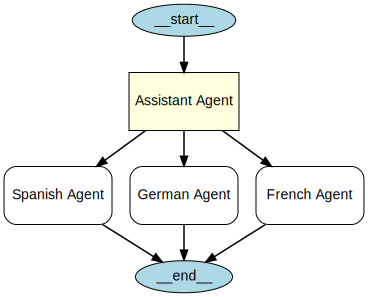

In [ ]:
# handoffs
from agents import Agent,Runner
from agents.extensions.visualization import draw_graph

spanish_agent = Agent(
    name = "Spanish Agent",
    instructions= "You are a helpful assistant that help in translation into spanish",
    model = "gemini-2.5-flash",
    handoff_description="Spanish Agent Specialized in Spanish Translation"
)
german_agent = Agent(
    name = "German Agent",
    instructions= "You are a helpful assistant that help in translation into german",
    model = "gemini-2.5-flash",
    handoff_description="German Agent Specialized in German Translation"
)
french_agent = Agent(
    name = "French Agent",
    instructions= "You are a helpful assistant that help in translation into french",
    model = "gemini-2.5-flash",
    handoff_description="French Agent Specialized in French Translation"
)

agent_with_handoffs = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    handoffs = [spanish_agent,german_agent,french_agent]
)
result_with_handoffs_1 = Runner.run_sync(
    starting_agent=agent_with_handoffs,
    input="Translate into Spanish this sentence 'My name is Saim Hassan'",
)
print(f"Handoff To Spanish Agent: {result_with_handoffs_1.final_output}")
print("=======" * 20)

result_with_handoffs_2 = Runner.run_sync(
    starting_agent=agent_with_handoffs,
    input="Translate into German this sentence 'My name is Saim Hassan'",
)
print(f"Handoff To German Agent: {result_with_handoffs_2.final_output}")
print("=======" * 20)

result_with_handoffs_3 = Runner.run_sync(
    starting_agent=agent_with_handoffs,
    input="Translate into French this sentence 'My name is Saim Hassan'",
)
print(f"Handoff To French Agent: {result_with_handoffs_3.final_output}")
print("=======" * 20)

# For Visualization of the agent execution
draw_graph(agent_with_handoffs)

# handoff_description

In [ ]:
from agents import Agent,Runner

spanish_agent = Agent(
    name = "Spanish Agent",
    instructions= "You are a helpful assistant that help in translation into spanish",
    model = "gemini-2.5-flash",
    handoff_description="Spanish Agent Specialized in Spanish Translation"
)
german_agent = Agent(
    name = "German Agent",
    instructions= "You are a helpful assistant that help in translation into german",
    model = "gemini-2.5-flash",
    handoff_description="German Agent Specialized in German Translation"
)

agent_with_handoff_description = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    handoffs = [spanish_agent,german_agent]
)
result_with_handoff_description_1 = Runner.run_sync(
    starting_agent=agent_with_handoff_description,
    input="Translate into Spanish this sentence 'Hi! How are you'",
)
print(f"Handoff To Spanish Agent With Handoffs Description: {result_with_handoff_description_1.final_output}")
print("=======" * 20)

result_with_handoff_description_2 = Runner.run_sync(
    starting_agent=agent_with_handoff_description,
    input="Translate into German this sentence 'Hi! How are you'",
)
print(f"Handoff To German Agent With Handoffs Description: {result_with_handoff_description_2.final_output}")
print("=======" * 20)

Handoff To Spanish Agent With Handoffs Description: ¡Hola! ¿Cómo estás?
Handoff To German Agent With Handoffs Description: Here are a few options, depending on the level of formality:

**Informal (most common for "Hi!"):**

*   **Hallo! Wie geht es dir?** (Hello! How are you? - literally "How goes it to you?")
*   **Hi! Wie geht's?** (Hi! How's it going? - a common, shorter form)

**Formal (if you were speaking to someone you don't know well or someone in a position of respect):**

*   **Hallo! Wie geht es Ihnen?** (Hello! How are you? - formal "you")


# mcp_servers
**For MCP Server Tools Incorporation With Our Agent**

# mcp_config
**To configure the setting for the MCP Server Tools incorporated with our agent.**

# hooks

In [ ]:
from datetime import time
from agents import Agent,Runner,AgentHooks,RunContextWrapper,Tool,function_tool
from agents.extensions.visualization import draw_graph
import random
import time

class AgentWithHooks(AgentHooks):
  def __init__(self,display_name:str):
    self.event_counter = 0
    self.display_name = display_name

  async def on_start(self, context : RunContextWrapper , agent : Agent):
    print(f"Display Name {self.display_name} :: Counter {self.event_counter} Usage :: {context.usage}")
    self.event_counter += 1

  async def on_end(self,context:RunContextWrapper,agent:Agent,final_output:str)->None:
    print(f"Display Name {self.display_name} :: Counter {self.event_counter} Usage :: {context.usage} Final :: {final_output}")
    self.event_counter += 1

  async def on_handoff(self,context:RunContextWrapper,agent:Agent,source:Agent)->None:
    print(f"Display Name {self.display_name} :: Counter {self.event_counter} Usage :: {context.usage} Handoff To :: {source.name}")

  async def on_tool_start(self, context: RunContextWrapper, agent: Agent, tool: Tool) -> None:
     print(f"Display Name {self.display_name} :: Counter {self.event_counter} Usage :: {context.usage} Tool :: {tool.name}")
     self.event_counter += 1

  async def on_tool_end(self, context: RunContextWrapper, agent: Agent, tool: Tool, result: str) -> None:
    print(f"Display Name  {self.display_name} :: Counter {self.event_counter} Usage :: {context.usage} Tool :: {tool.name} Result :: {result}")
    self.event_counter += 1

@function_tool
def multiply(a:int,b:int) -> int:
  """Multiplies two numbers"""
  return a * b

@function_tool
def random_number(min:int,max:int) -> int:
  """Returns a random number"""
  return random.randint(min,max)

multiply_agent = Agent(
    name = "Multiply Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    tools = [multiply],
    hooks = AgentWithHooks(display_name="Multiply Agent"),
    handoff_description="Multiply Agent Specialized in Multiplication"
)

main_agent = Agent(
    name = "Main Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    tools = [random_number],
    handoffs = [multiply_agent],
    hooks = AgentWithHooks(display_name="Main Agent"),
)
result_with_hooks = Runner.run_sync(
    starting_agent=main_agent,
    input="Multiply 5 and 10",
)
print(f"Hooks : {result_with_hooks.final_output}")
print("=======" * 20)

result_with_hooks_2 = Runner.run_sync(
    starting_agent=main_agent,
    input="Generate a random number between 0 and 10",
)
print(f"Hooks : {result_with_hooks_2.final_output}")
print("=======" * 20)

Display Name Main Agent :: Counter 0 Usage :: Usage(requests=0, input_tokens=0, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=0, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=0)
Display Name Main Agent :: Counter 1 Usage :: Usage(requests=1, input_tokens=105, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=14, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=196) Handoff To :: Main Agent
Display Name Multiply Agent :: Counter 0 Usage :: Usage(requests=1, input_tokens=105, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=14, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=196)
Display Name Multiply Agent :: Counter 1 Usage :: Usage(requests=2, input_tokens=206, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=33, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=368) Tool :: multiply

In [ ]:
# Hooks can change our context
from dataclasses import dataclass
from typing import Any, List

from agents import Agent, Runner, AgentHooks, function_tool,ToolsToFinalOutputResult

@dataclass
class MyContext:
    name: str
    tool_calls: int = 0  # we’ll increment this in our hook

@function_tool
def echo_tool(ctx: MyContext, message: str) -> str:
    return f"{ctx.name} says: {message}"

class CounterHook(AgentHooks[MyContext]):
    async def on_tool_start(
        self,
        context,
        agent,
        tool,
    ) -> None:
      print(f"🔔 Tool '{tool.name}' started. Total calls so far: {context.context.tool_calls}")
    async def on_tool_end(
        self,
        context,
        agent,
        tool,
        result: Any
    ) -> None:
        context.context.tool_calls += 1
        print(f"🔔 Tool '{tool.name}' finished. Total calls so far: {context.context.tool_calls}")

def stop_after_one(
    context,
    tool_results: List[Any]
) -> ToolsToFinalOutputResult:
    for tr in tool_results:
      if tr.tool.name == "echo_tool":
        return ToolsToFinalOutputResult(is_final_output=True, final_output=tr.output)
    # as soon as any tool runs, stop
    return ToolsToFinalOutputResult(is_final_output=True, final_output=tool_results[-1].output)

agent = Agent[MyContext](
    name="CounterAgent",
    instructions="Echo back the user’s message using echo_tool, then stop.",
    tools=[echo_tool],
    tool_use_behavior=stop_after_one,
    model="gemini-2.5-flash",
    hooks = CounterHook()
)

result = Runner.run_sync(
    starting_agent=agent,
    input="Hello, world!",
    context=MyContext(name="Saim"),
    # attach our hook here
)

print("🏁 Final Output:", result.final_output)

🔔 Tool 'echo_tool' started. Total calls so far: 0
🔔 Tool 'echo_tool' finished. Total calls so far: 1
🏁 Final Output: echo_tool says: Hello, world!


# input_guardrails

In [ ]:
# input_guardrails
from agents import Agent,Runner,GuardrailFunctionOutput,RunContextWrapper,InputGuardrail,InputGuardrailTripwireTriggered,input_guardrail
from pydantic import BaseModel,Field

class HomeWork(BaseModel):
  reasoning : str = Field(description="Reasoning about whether the user input is related to homework or not")
  is_homework : bool

homework_guardrail_agent = Agent(
    name = "Homework Agent",
    instructions= "You are a helpful assistant.Check if the user is asking about HomeWork",
    model = "gemini-2.5-flash",
    output_type = HomeWork
)

class Department(BaseModel):
  is_IT_department : bool
  is_HR_department : bool

department_guardrail_agent = Agent(
    name = "Department Agent",
    instructions= "You are a helpful assistant.Check if the user asking is from IT or HR department",
    model = "gemini-2.5-flash",
    output_type = Department
)

def input_guardrails_1(ctx:RunContextWrapper,agent:Agent,input_text:str):
  input_guardrails_1_result = Runner.run_sync(
      starting_agent=homework_guardrail_agent,
      input=input_text,
      context = ctx.context
  )
  final_output_1 = input_guardrails_1_result.final_output_as(HomeWork)
  return GuardrailFunctionOutput(
      output_info=final_output_1,
      tripwire_triggered= not final_output_1.is_homework
  )

@input_guardrail
async def input_guardrails_2(ctx:RunContextWrapper,agent:Agent,input_text:str):
  input_guardrails_2_result = await Runner.run(
      starting_agent=department_guardrail_agent,
      input=input_text,
      context = ctx.context
  )
  final_output_2 = input_guardrails_2_result.final_output_as(Department)
  return GuardrailFunctionOutput(
      output_info=final_output_2,
      tripwire_triggered= not final_output_2.is_IT_department
  )

agent_with_input_guardrails = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    input_guardrails = [InputGuardrail(guardrail_function=input_guardrails_1),
                        input_guardrails_2]
)
try:
 result_with_input_guardrails = Runner.run_sync(
    starting_agent=agent_with_input_guardrails,
    input="What is conversational ai in 100 words and I am from IT department",
)
 print(f"Agent Input Guardrails : {result_with_input_guardrails.final_output}")
 print("=======" * 20)
except InputGuardrailTripwireTriggered as e:
  print(f"Input Guardrails Triggered: {e.guardrail_result.output.output_info}")
  print(f"Input Guardrails Triggered: {e.guardrail_result.output.tripwire_triggered}")
  print(f"Sorry I can help you with only Homework Related Question if you are from IT Department Only")
  print("=======" * 20)

Input Guardrails Triggered: reasoning="The user is asking for a definition of a technical concept ('conversational AI') and provides context about their professional department ('IT department'). This is a request for information and knowledge, not a typical homework assignment that would involve problem-solving, essay writing, or specific academic tasks." is_homework=False
Input Guardrails Triggered: True
Sorry I can help you with only Homework Related Question if you are from IT Department Only


# output_guardrails

In [ ]:
# output_guardrails
from agents import Agent,Runner,GuardrailFunctionOutput,RunContextWrapper,OutputGuardrail,OutputGuardrailTripwireTriggered,output_guardrail
from pydantic import BaseModel,Field

class MessageOutput(BaseModel):
  reasoning : str = Field(description="The reason behind your response")
  response : str = Field(description="The actual response to the user")
  user_name : str = Field(description="The name of the user")

name_checker_guardrail_agent = Agent(
    name = "Output Guardrail Agent",
    instructions= "You are a helpful assistant.Check if the user name is included in the response",
    model = "gemini-2.5-flash",
    output_type = MessageOutput
)

def output_guardrails_1(ctx:RunContextWrapper,agent:Agent,output:MessageOutput)->GuardrailFunctionOutput:
  phone_num_in_response = "0300" in output.response
  phone_num_in_reasoning = "0300" in output.reasoning
  return GuardrailFunctionOutput(
      output_info = {
          "is_phone_number_in_response" : phone_num_in_response,
          "is_phone_number_in_reasoning" : phone_num_in_reasoning
      },
      tripwire_triggered= phone_num_in_response or phone_num_in_reasoning
  )

@output_guardrail
async def output_guardrails_2(ctx:RunContextWrapper,agent:Agent,output:MessageOutput):
  output_guardrails_2_result = await Runner.run(
      starting_agent=name_checker_guardrail_agent,
      input=output.response,
      context=ctx.context
  )
  # final_output_2 = output_guardrails_2_result.final_output_as(MessageOutput)
  final_output_2 = output_guardrails_2_result.final_output
  return GuardrailFunctionOutput(
      output_info=final_output_2,
      tripwire_triggered = final_output_2.user_name
  )

agent_with_output_guardrails = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
    output_guardrails = [OutputGuardrail(guardrail_function=output_guardrails_1),
                        output_guardrails_2],
    output_type = MessageOutput
)
try:
  result_with_output_guardrails = Runner.run_sync(
      starting_agent=agent_with_output_guardrails,
      input="My name is 'Saim Hassan',reply me with my name" # Try with phone number as input as well to check the other Output Guardrail
  )
  print(f"Agent Output Guardrails : {result_with_output_guardrails.final_output}")
  print("=======" * 20)
except OutputGuardrailTripwireTriggered as e:
  print(f"Output Guardrails Triggered : {e.guardrail_result.output.output_info}")
  print(f"Output Guardrails Triggered : {e.guardrail_result.output.tripwire_triggered}")
  print(f"Sorry As your request contains Sensitive data so I cannot approve it")
  print("=======" * 20)

Output Guardrails Triggered : reasoning="The user provided their name 'Saim Hassan' in the greeting. I am acknowledging the greeting and including the extracted name in the 'user_name' field." response="Hello Saim Hassan! It's good to hear from you." user_name='Saim Hassan'
Output Guardrails Triggered : Saim Hassan
Sorry As your request contains Sensitive data so I cannot approve it


# tool_use_behavior

In [ ]:
# ToolsToFinalOutputFunction
from typing_extensions import final
from agents import (
    ToolsToFinalOutputResult,
    ToolsToFinalOutputFunction,
    function_tool,
    RunContextWrapper,
)
from pydantic import BaseModel
from typing import Any
from dataclasses import dataclass

@function_tool
def reverse_tool(context: RunContextWrapper, text: str) -> str:
    """Transforms input text uniquely."""
    return f"SPECIAL REVERSE 🚗 : {text[::-1]}"

def toolfuncoutput(context : RunContextWrapper,tool_results :list[Any]) -> ToolsToFinalOutputResult :
  for tr in tool_results:
    if tr.tool.name == "reverse_tool":
      return ToolsToFinalOutputResult(
          is_final_output = True,
          final_output = tr.output
      )
  return ToolsToFinalOutputResult(is_final_output=False)

agent = Agent(
    name = "Assistant Agent",
    instructions=     "You are a helpful assistant.\n"
    "Use reverse_tool to reverse text when appropriate.",
    model = "gemini-2.5-flash",
    tools = [reverse_tool],
    tool_use_behavior=toolfuncoutput
)

result = Runner.run_sync(
    starting_agent=agent,
    input=" Reverse these letters 'My Name is Saim, How Are You'",
)
print(f"ToolsToFinalOutputFunction : {result.final_output}")
print("========"*20)

# stop_on_first_tool
@function_tool
def add( a: int, b: int) -> int:
    """Adds two numbers."""
    return a + b

@function_tool
def subtract( a: int, b: int) -> int:
    """Subtracts two numbers."""
    return a - b

agent1 = Agent(
    name = "Calculator Agent",
    instructions= "You are a special agent that helps with calculations",
    model = "gemini-2.5-flash",
    tools = [add,subtract],
    tool_use_behavior = "stop_on_first_tool"
)

result1 = Runner.run_sync(
    starting_agent=agent1,
    input="Add 5 and 10",
)
print(f"Stop On First Tool : {result1.final_output}")
print("========"*20)

# StopAtTools
@function_tool
def add( a: int, b: int) -> int:
    """Adds two numbers."""
    return a + b

@function_tool
def subtract( a: int, b: int) -> int:
    """Subtracts two numbers."""
    return a - b

agent2 = Agent(
    name = "Calculator Agent",
    instructions= "You are a special agent that helps with calculations",
    model = "gemini-2.5-flash",
    tools = [add,subtract],
    tool_use_behavior = {
        "stop_at_tool_names" : ["add","subtract"]
    }
)

result2 = Runner.run_sync(
    starting_agent=agent2,
    input="subtract 10 from 100 and add 20 and 30",
)
print(f"StopAtTools : {result2.final_output}")
print("========"*20)
# Will stop on first tool call name "add"

# run_llm_again
@function_tool
def add( a: int, b: int) -> int:
    """Adds two numbers."""
    return a + b

@function_tool
def subtract( a: int, b: int) -> int:
    """Subtracts two numbers."""
    return a - b

agent3 = Agent(
    name = "Calculator Agent",
    instructions= "You are a special agent that helps with calculations",
    model = "gemini-2.5-flash",
    tools = [add,subtract],
    tool_use_behavior = "run_llm_again"
)

result3 = Runner.run_sync(
    starting_agent=agent3,
    input="subtract 10 from 100 and add 20 and 30",
)
print(f"Run LLm Again : {result3.final_output}")
print("========"*20)

ToolsToFinalOutputFunction : SPECIAL REVERSE 🚗 : uoY erA woH ,miaS si emaN yM
Stop On First Tool : 15
StopAtTools : 90
Run LLm Again : The result of subtracting 10 from 100 is 90. The result of adding 20 and 30 is 50.


# reset_tool_choice
**reset_tool_choice is a bool parameter that is default to True so if there are changes in 'tool_choice' in ModelSettings so to reset it to 'auto' again to prevent the infinite loop after every turn.**

# output_type

In [ ]:
# 1st method for output_type
from agents import Agent,Runner
from pydantic import BaseModel

class OutputType(BaseModel):
  reasoning : str
  response :  str

agent1_with_output_type = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-pro",
    output_type = OutputType
)
result1_with_output_type = await Runner.run(
    starting_agent=agent1_with_output_type,
    input="What is the future of AI in 100 words",
)
print(f"Output Type : {result1_with_output_type.final_output}")
print(f"Output Type Reasoning: {result1_with_output_type.final_output.reasoning}")
print(f"Output Type Response: {result1_with_output_type.final_output.response}")
print("=======" * 20)

Output Type : reasoning="The user requested a 100-word summary about the future of AI. I will synthesize key future trends, including deeper integration into daily life, its role as a collaborative tool for complex problem-solving, economic impacts, and the associated ethical challenges. I will ensure the response is concise and within the specified word count, presenting a balanced view of AI's potential and the necessary considerations for its development." response='The future of AI points towards its seamless integration into the fabric of daily life, from autonomous transportation and hyper-personalized healthcare to dynamic, AI-driven education and entertainment. It will evolve from a tool into a collaborative partner, augmenting human intellect to tackle complex global challenges like climate change and disease. While the pursuit of Artificial General Intelligence (AGI) continues, the economic landscape will be reshaped by AI-driven automation and new job creation. Navigating th

In [ ]:
# 2nd method of output_type
from agents import Agent,Runner,AgentOutputSchema
from pydantic import BaseModel,Field

class OutputType2(BaseModel):
  response : str
  is_homework : bool
  is_good_question : bool

agent2_with_output_type = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-pro",
    output_type = AgentOutputSchema(output_type=OutputType2,strict_json_schema=False)
)
result2_with_output_type = await Runner.run(
    starting_agent=agent2_with_output_type,
    input="What is cloud computing in 100 words",
)
print(f"Output Type : {result2_with_output_type.final_output}")
print(f"Output Type Response: {result2_with_output_type.final_output.response}")
print(f"Output Type is_homework: {result2_with_output_type.final_output.is_homework}")
print(f"Output Type is_good_question: {result2_with_output_type.final_output.is_good_question}")
print("=======" * 20)

Output Type : response='Cloud computing is the on-demand delivery of IT resources and services over the internet with pay-as-you-go pricing. Instead of buying, owning, and maintaining your own physical data centers and servers, you can access technology services from a cloud provider like Amazon Web Services (AWS) or Microsoft Azure. These services include computing power, storage, databases, networking, and software. This model offers faster innovation, flexible resources, and economies of scale, allowing businesses to scale operations efficiently without large upfront capital investments. It empowers users to access data and applications from virtually any device with an internet connection.' is_homework=True is_good_question=True
Output Type Response: Cloud computing is the on-demand delivery of IT resources and services over the internet with pay-as-you-go pricing. Instead of buying, owning, and maintaining your own physical data centers and servers, you can access technology servi

# Agent Class
**Agent Class Contains Following Methods**

1. **clone** :: For the cloning the agent with overriding desired parameters
2. **as_tool** :: To use an agent as a function_tool for another agent
3. **get_system_prompt** :: To get the system prompt for the agent
4. **get_prompt** :: To get the prompt for the agent
5. **get_mcp_tools** :: To get the lsit of MCP server tools available to the agent
6. **get_all_tools** :: To get the list of all the tools avilable to the agent including both FunctionTools and Hosted MCP tools.

# clone()

In [ ]:
# clone
from agents import Agent

agent_1 = Agent(
    name = "Assistant Agent",
    instructions= "You are a helpful assistant.",
    model = "gemini-2.5-flash",
)
agent_2 = agent_1.clone(
    name = "Clone Agent",
    instructions = "You are a helpful Clone Assistant",
    model = "gemini-2.5-pro"
)
agent_3 = agent_2.clone(
    name = "Clone Agent 2",
    instructions = "You are a helpful Clone Assistant 2",
)

print(f"Agent 1 : {agent_1.name}")
print(f"Agent 2 : {agent_2.name}")
print(f"Agent 3 : {agent_3.name}")

Agent 1 : Assistant Agent
Agent 2 : Clone Agent
Agent 3 : Clone Agent 2


# as_tool()

In [ ]:
from agents import Agent,Runner

agent_summarization = Agent(
    name = "Summarization Agent",
    instructions="You are a summarization agent that makes a summary of the given topic in 100 words",
    model="gemini-2.5-pro",
)

main_agent = Agent(
    name = "Main Agent",
    instructions="Reply with user queries",
    tools = [agent_summarization.as_tool(
        tool_name="Summarization_Tool",
        tool_description="Summarization Tool that summarizes the topic into 100 words",
    )],
    model = "gemini-2.5-flash"
)
result_with_as_tool = await Runner.run(
    starting_agent=main_agent,
    input="Write a summary of the 'Machine Learning'"
)
print(result_with_as_tool.final_output)

Machine Learning (ML) is a subfield of Artificial Intelligence that enables systems to learn and improve from experience without being explicitly programmed. Core to ML are algorithms that parse data, identify patterns, and build models to make predictions or decisions. The primary types are supervised learning (using labeled data), unsupervised learning (finding hidden structures in unlabeled data), and reinforcement learning (learning through rewards and penalties). This technology powers countless applications, including recommendation engines, natural language processing, medical diagnostics, and autonomous vehicles, transforming industries by extracting valuable insights and automating complex tasks.


In [ ]:
agent_tool = agent_summarization.as_tool(
    tool_name=None,
    tool_description=None,
)
print(agent_tool)
print(agent_tool.name)
print(f"The description is {agent_tool.description}")


FunctionTool(name='summarization_agent', description='', params_json_schema={'properties': {'input': {'title': 'Input', 'type': 'string'}}, 'required': ['input'], 'title': 'summarization_agent_args', 'type': 'object', 'additionalProperties': False}, on_invoke_tool=<function function_tool.<locals>._create_function_tool.<locals>._on_invoke_tool at 0x7d5fd0a60b80>, strict_json_schema=True, is_enabled=True)
summarization_agent
The description is 


In [ ]:
# as_tool() with custom_output_extractor
agent_tool = agent_summarization_2.as_tool(
    tool_name="Summarization_Tool",
    tool_description="Summarization Tool that summarizes the topic in 5 line each line with an emoji",
)
print(agent_tool)
print(agent_tool.name)
print(f"The description is {agent_tool.description}")

from pydantic import BaseModel

class CustomOutput(BaseModel):
  summary : str
  reasoning : str
  is_good_response : bool

agent_summarization_2 = Agent(
    name = "Summarization Agent",
    instructions="You are a summarization agent that makes a summary of the given topic in 5 line each line with an emoji",
    model="gemini-2.5-flash",
    output_type = CustomOutput
)

async def custom_output_extractor(run_result):
  get_output = run_result.final_output_as(CustomOutput)
  return get_output.summary

main_agent_2 = Agent(
    name = "Main Agent",
    instructions="Reply with user queries",
    tools = [agent_summarization_2.as_tool(
        tool_name="Summarization_Tool",
        tool_description="Summarization Tool that summarizes the topic in 5 line each line with an emoji",
        custom_output_extractor=custom_output_extractor)],
    model = "gemini-2.5-flash"
)
result_with_as_tool_2 = await Runner.run(
    starting_agent=main_agent_2,
    input="Write a summary of the 'Deep Learning'"
)
print(result_with_as_tool_2.final_output)

FunctionTool(name='Summarization_Tool', description='Summarization Tool that summarizes the topic in 5 line each line with an emoji', params_json_schema={'properties': {'input': {'title': 'Input', 'type': 'string'}}, 'required': ['input'], 'title': 'Summarization_Tool_args', 'type': 'object', 'additionalProperties': False}, on_invoke_tool=<function function_tool.<locals>._create_function_tool.<locals>._on_invoke_tool at 0x7d5fd0a63740>, strict_json_schema=True, is_enabled=True)
Summarization_Tool
The description is Summarization Tool that summarizes the topic in 5 line each line with an emoji
Deep Learning is a subset of Machine Learning. 🧠It uses artificial neural networks with multiple layers. 🏗️These networks learn complex patterns from vast amounts of data. 📈It excels in tasks like image recognition and natural language processing. 🤖DL models automatically discover features, making them powerful for predictions. ✨



# get_system_prompt

In [ ]:
from agents import Agent,Runner,RunContextWrapper
from pydantic import BaseModel

# static_prompt
agent_with_system_prompt = Agent(
    name = "Summarization Agent",
    instructions="You are a summarization agent that makes a summary of the given topic in 100 words",
    model="gemini-2.5-pro",
)
system_prompt = await agent_with_system_prompt.get_system_prompt(run_context=None)
print(system_prompt)

# dynamic_prompt
class Userdata(BaseModel):
  name : str
  age : int

async def system_prompt(context:RunContextWrapper[Userdata],agent:Agent):
  return f"Your name is {context.context.name} and you are {context.context.age} years old"

agent_with_system_prompt_2 = Agent(
    name = "Info Agent",
    instructions=system_prompt,
    model="gemini-2.5-pro",
)
run_context = RunContextWrapper(context=Userdata(name="Saim Hassan",age=21))
system_prompt_2 = await agent_with_system_prompt_2.get_system_prompt(run_context)
print(system_prompt_2)


You are a summarization agent that makes a summary of the given topic in 100 words
Your name is Saim Hassan and you are 21 years old


# get_prompt , get_mcp_tools, get_all_tools

In [ ]:
result =  await agent_with_system_prompt.get_prompt(run_context=run_context)
print(result)
result_2 = await agent_with_system_prompt.get_mcp_tools(run_context=None)
print(result_2)
result_3 = await agent_with_system_prompt.get_all_tools(run_context=None)
print(result_3)
# all of this attributes are None or Empty in Case Of Our Agent.Above are example cases of how to use the

None
[]
[]
